# La viabilità: spese e fabbisogni nei comuni italiani

Some Markdown text with <span style="color:red;font-family: Babas">some *blue* text</span>.


Quante volte il numero di buche incontrate su una strada viene utilizzato come indicatore per valutare l'operato di un sindaco? Sicuramente, il mantenimento della città assicurando ai cittadini delle infrastrutture funzionali e funzionanti, strade non dissestate richiede un impegno economico non banale. 


Tra le voci di bilancio di un comune italiano rientra quella di *viabilità*. Questa voce comprende, non solo i costi dell'asfalto per ricoprire le buche sulle strade, bensì anche tutti i costi relativi agli interventi infrastrutturali necessari per migliorare la mobilità urbana sia per le autovetture ed i motocicli sia per chi è più green ed opta per mezzi di trasporto come la bicicletta e le gambe. In più, sono incluse in questa voce le spese relative all'arredo urbano strumentale alla circolazione.


In questo approfondimento poniamo l'attenzione su un indicatore particolare fornito dai dati OpenCivitas: la *differenza percentuale tra spesa storiaca e fabbisogni standard* rispetto ai fabbisogni dei comuni italiani, con riferimento alla spesa ed al fabbisogno relativi alla viabilità. La variabile verrà confrontata con quelche altro inficatore con lo scopo di studiare le caratteristiche dei comuni la cui differenza tra spesa storica e fabbisogni standard è definita secondo le seguenti fasce:

* __Fascia 2__: La differenza percentuale è maggiore di 100, il che descrive che la spesa è almeno due volte i fabbisogni del comune.
* __Fascia 1__: La differenza percentuale è compresa tra 25 e 100, quindi la spesa è tra una e due volte più grande dei fabbisogni.
* __Fascia 0__: La differenza perdentuale è compresa tra -25 e 25, quindi la spesa è di poco più grande o più piccola dei fabbisogni standard.
* __Fascia -1__: La differenza percentuale è compresa tra -25 e -50, quindi i fabbisogni sono tra una e due volte più grande della spesa.
* __Fascia -2__: La differenza percentuale è compresa tra -50 e -100, il che descrive che i fabbisogni sono almeno due volte la spesa del comune.


__Nota:__ In questo documento potrete trovare le procedure che portano ad i risultati cosicchè possiate autonomamente riprodurle nel momento i cui i dati saranno aggiornati agli anni successivi al 2013.


### Indice
1. [Anno 2010](#2010)    
    1.1 [Spesa pro-capite: top-10 e bottom-10 dei comuni italiani](#par1.1)    
    1.2 [Differenza percentuale tra spesa storica e fabbisogno standard](#par1.2)

2. [Anno 2013](#2013)     
    2.1 [Spesa pro-capite: top-10 e bottom-10 dei comuni italiani](#par2.1)
3. [Confronto anni 2010-2013](#vs)



## Anno 2010 <a name="#2010"></a>

In questa sezione tutte le analisi svolte saranno relative all'anno 2010.

In [70]:
# Importare librerie utili all'analisi
import math
import numpy as np
import pandas as pd
#import seaborn as sns
#sns.set(color_codes=True)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict

* Importare dati per svolgere l'analisi:
    - __Dataset 1__: `Open Civitas` fabbisogni comuni 2010.
    - __Dataset 2__: `Anagrafica dei comuni`, 2010.

In [2]:
# Importare dataset 1 e selezionare i dati relativi al 2010
df_integrato = pd.read_csv('opencivitas-spesa-storica+dati-irpef.csv', sep = ',')
df_integrato_2010 = df_integrato[df_integrato['ANNO']==2010]

# Importare dataset 2 
df_2010 = pd.read_csv('FC04A_funz_viabilita2010.csv', sep = ',')[['Anno', 'Codice_Nazionale', 'Codice_Istat',
       'Denominazione Italiana', 'Provincia', 'Sigla Provincia',
       'Codice_Provincia', 'Regione', 'Sigla Regione', 'Codice_Regione',
       'AreaGeo', 'CAT_DET_COD_1', 'CAT_DET_COD_2', 'CAT_DET_COD_3',
       'CAT_DET_COD_4', 'CAT_DET_COD_5', 'CAT_DET_COD_6', 'CAT_DET_COD_7',
       'COEFF_TEORICO', 'IND1', 'IND3', 'IND4', 'IND5', 'IND6', 'IND7', 'IND8',
       'IND9', 'IND10', 'LQP_COD_1', 'LQP_COD_2', 'LQP_COD_3', 'LQP_COD_4',
       'LQP_COD_5', 'LQP_COD_6', 'LQP_COD_S']]

* Otteniamo una vista sul Dataset 1

In [3]:
df_integrato_2010.head(3)

,ANNO,COMUNE_CAT_COD,SPESA_CCC_FC01A,TOT_SPESA_CCC_FC01A,SPESA_CCC_FC01B,TOT_SPESA_CCC_FC01B,SPESA_CCC_FC01C,TOT_SPESA_CCC_FC01C,SPESA_CCC_FC01D,TOT_SPESA_CCC_FC01D,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione,Sigla Provincia_y,tot_abitanti_tasse
0,2010,A001,128832.900000,4.971702e+08,706678.700000,1.024500e+09,210454.3,551023543.0,2160820.2,6.386494e+09,...,NaN,288473057.0,11377.0,NaN,NaN,NaN,NaN,VENETO,PD,14102.0
1,2010,A004,48.290741,4.971702e+08,3022.240741,1.024500e+09,54.6,551023543.0,110355.7,6.386494e+09,...,NaN,3396780.0,170.0,NaN,NaN,NaN,NaN,LOMBARDIA,LO,207.0
2,2010,A005,50458.800000,4.971702e+08,143147.200000,1.024500e+09,59466.4,551023543.0,359500.4,6.386494e+09,...,NaN,49890297.0,2035.0,NaN,NaN,NaN,NaN,LOMBARDIA,LC,2438.0


* Otteniamo una vista sul Dataset 2

In [4]:
df_2010.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana,Provincia,Sigla Provincia,Codice_Provincia,Regione,Sigla Regione,Codice_Regione,...,IND8,IND9,IND10,LQP_COD_1,LQP_COD_2,LQP_COD_3,LQP_COD_4,LQP_COD_5,LQP_COD_6,LQP_COD_S
0,2010,A052,6001.0,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.589474,30.0,3.260023,39.823718,-24.516654,0.0,0.0,8.0,3.0,3.0
1,2010,A146,6002.0,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,6.191950,86.235965,-19.242343,0.0,0.0,10.0,4.0,2.8
2,2010,A182,6003.0,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,5.0,6.538632,-73.740234,-27.195587,0.0,1.0,1.0,3.0,5.8


* Quindi uniamo le informazioni contenute nei due dataset utilizzando come elemento comune il `Codice nazionale` di ogni comune, e mostriamo una vista del dataset ottenuto.

In [5]:
df = pd.merge(df_2010,  df_integrato_2010, right_on = 'COMUNE_CAT_COD', left_on = 'Codice_Nazionale', how = 'left')

df.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana_x,Provincia,Sigla Provincia,Codice_Provincia,Regione_x,Sigla Regione,Codice_Regione,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione_y,Sigla Provincia_y,tot_abitanti_tasse
0,2010,A052,6001.0,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,NaN,2.671122e+08,11792.0,NaN,NaN,NaN,NaN,PIEMONTE,AL,15071.0
1,2010,A146,6002.0,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,NaN,3.641624e+06,200.0,NaN,NaN,NaN,NaN,PIEMONTE,AL,267.0
2,2010,A182,6003.0,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,NaN,1.313600e+09,55344.0,NaN,NaN,NaN,NaN,PIEMONTE,AL,68749.0


* Effettuiamo un controllo sul numero di comuni che non sono in entrambi i dataset e di cui, necessariamente abbiamo perso le informazioni unendo i due dataset.

In [6]:
print ("Nel passaggio precedente abbiamo perso le informazioni relative a ", sum(df['Regione_y'].isnull()==True)/len(df['Codice_Nazionale'].unique())*100 , "% dei comuni. Vista la bassa percentuale proseguiamo l'analisi.")

Nel passaggio precedente abbiamo perso le informazioni relative a  0.134288272158 % dei comuni. Vista la bassa percentuale proseguiamo l'analisi.


### 1.1. Spesa pro-capite: top-10 e bottom-10 delle province italiane <a name="#par1.1"></a>

Per avere un'idea di quanto sia la spesa procapite nei comuni d'Italia, presentiamo la classifica dei 10 comuni che spendono di più e dei 10 che spendono di meno.

Prima di selezionare i comuni prendiamo in considerazione la distribuzione dell'indicatore che indica la spesa del comune pero-capite per la viabilità.

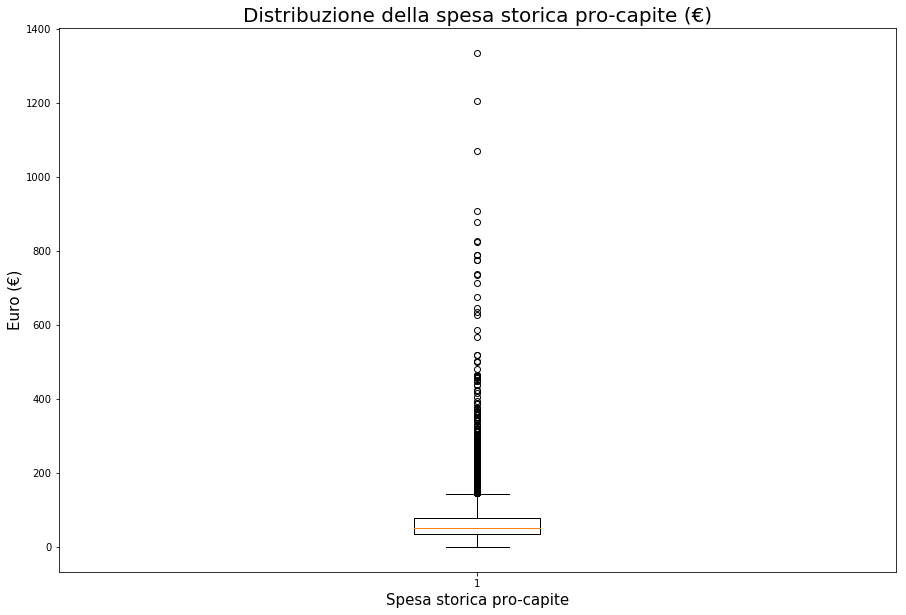

In [7]:
# Non consideriamo i valori nulli
distr_ = [i for i in df['IND1'] if math.isnan(i)==False]

# Creiamo un plot che ci mostri la distribuzione dell'indicatore sui comuni
plt.figure(figsize=(15,10))
plt.boxplot(np.array(distr_))
plt.title('Distribuzione della spesa storica pro-capite (€)', fontsize = 20)
plt.xlabel('Spesa storica pro-capite', fontsize = 15)
plt.ylabel('Euro (€)', fontsize = 15)

Dal grafico osserviamo che ci sono tanti valori fuori dal box e dalla differenza interquartilica. Questi valori sono definiti outliers. Essendo  i valori assunti un po' irragionevoli (troppo elevati) li eliminiamo dalla nostra analisi di spesa procapite. Inpiù, decidiamo di rimuovere quei comuni che registrano come valore 0. 

__In generale__ sarebbe interessante studiare i comuni che risultano essere outliers e che registrano una spesa procapite pari a zero. Non ci soffermiamo du questo punto in quanto non obiettivo dell'analisi.

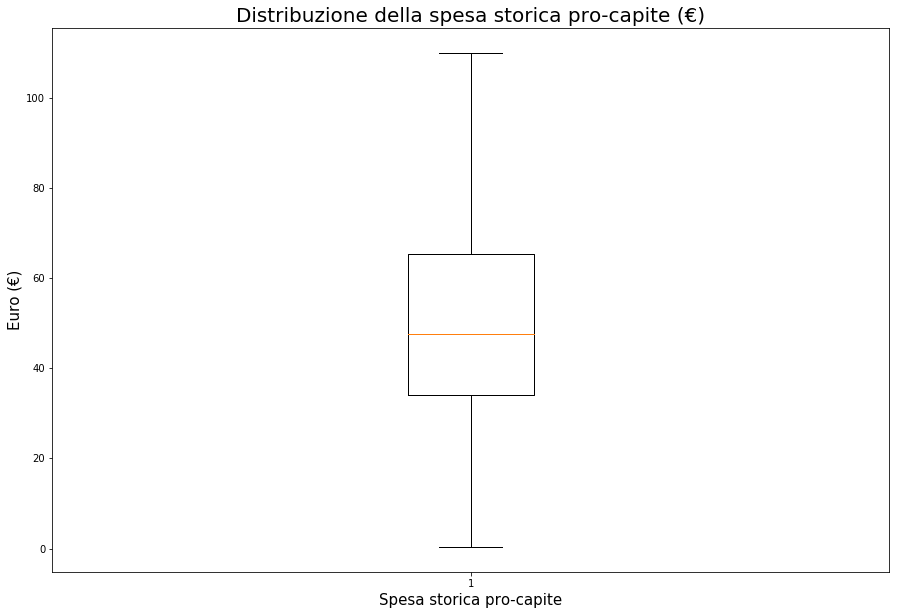

In [14]:
# Non consideriamo i valori nulli
distr_ = [i for i in df['IND1'] if math.isnan(i)==False and i < 110 and i > 0]

# Creiamo un plot che ci mostri la distribuzione dell'indicatore sui comuni
plt.figure(figsize=(15,10))
plt.boxplot(np.array(distr_))
plt.title('Distribuzione della spesa storica pro-capite (€)', fontsize = 20)
plt.xlabel('Spesa storica pro-capite', fontsize = 15)
plt.ylabel('Euro (€)', fontsize = 15)

Quindi, nel 50% dei comuni la spesa pro-capite dei comuni italiani è compresa tra 0 e ~50 euro. Mentre solo il 25% dei comuni spende più di ~70 euro per cittadino.

### Bottom 10

I comuni italiani con la spesa pro-capite (superiore a zero) per la viabilità sono i seguenti. 

La spesa oscilla tra i 30 centesimi di Diano Aretino, un paese ligure con meno di 700 abitanti, dove si suppone che viste le dimension del comune la spesa per la viabilità sia molto ridotta, fino ai poco più di 3 euro di Marano di Napoli, che nonostante sia una dei comuni più popolosi nella zona metropolitana di Napoli registra un valore di molto inferiore alla mediana nazionale. 

In [17]:
# Ottieni la lista dei comuni
df[['Denominazione Italiana_x', 'IND1', 'Regione_x', 'AreaGeo']][(df['IND1'] > 0) & (df['IND1']<110)].sort_values('IND1')[:10]

,Denominazione Italiana_x,IND1,Regione_x,AreaGeo
2937,Diano Arentino,0.316240,Liguria,Nord-ovest
3459,Arese,0.526802,Lombardia,Nord-ovest
1439,Pisogne,0.825632,Lombardia,Nord-ovest
3934,Galliate,2.204568,Piemonte,Nord-ovest
3912,Briona,2.204568,Piemonte,Nord-ovest
1662,San Gregorio Matese,2.231237,Campania,Sud
3568,Noviglio,2.233495,Lombardia,Nord-ovest
3719,Cavezzo,2.733093,Emilia-Romagna,Nord-est
2649,Mattinata,2.946821,Puglia,Sud
3846,Marano di Napoli,3.037104,Campania,Sud


### Top 10

Evidenziamo quindi i comuni con la spesa pro-capite più elevata.

Tutti i comuni eccetto Badia Tedalda e Santa Cristina d'Aspromonte si trovano nel Nord Italia. Viste le dimensioni del comune calabro, questo ammontare di spesa risulta senz'altro eccessivo. 


In generale, tutti i paesi in lista registrano una popolazione bassa. Come minimo ci aspettiamo delle strade perfette nei loro dintorni!

In [26]:
# Ottieni la lista dei comuni
df[['Denominazione Italiana_x', 'IND1', 'Regione_x','Provincia' ,'AreaGeo']][(df['IND1'] > 0) & (df['IND1']<110)].sort_values('IND1')[-10:]

,Denominazione Italiana_x,IND1,Regione_x,Provincia,AreaGeo
183,Villamiroglio,109.405325,Piemonte,Alessandria,Nord-ovest
4290,Bardi,109.461430,Emilia-Romagna,Parma,Nord-est
2181,Rodero,109.592801,Lombardia,Como,Nord-ovest
4810,Santa Cristina d'Aspromonte,109.756513,Calabria,Reggio di Calabria,Sud
1042,Sala Biellese,109.792664,Piemonte,Biella,Nord-ovest
5756,Novalesa,109.816454,Piemonte,Torino,Nord-ovest
2929,Cervo,109.833333,Liguria,Imperia,Nord-ovest
2947,Molini di Triora,109.908602,Liguria,Imperia,Nord-ovest
760,Azzone,109.933638,Lombardia,Bergamo,Nord-ovest
422,Badia Tedalda,109.991056,Toscana,Arezzo,Centro


### 1.2. Differenza percentuale tra spesa storica e fabbisogno standard  <a name='par1.2'></a>

Proseguiamo quindi ponendo la nostra attenzione su la differenza percentuale tra la spesa storica ed il fabbisogno standard dei comuni italiani. In particolare, ad ogni comune mettiamo una label che specifica a quale fascia il comune appartiene.

* __Fascia 2__: La differenza percentuale è maggiore di 100, il che descrive che la spesa è almeno due volte i fabbisogni del comune.
* __Fascia 1__: La differenza percentuale è compresa tra 25 e 100, quindi la spesa è tra una e due volte più grande dei fabbisogni.
* __Fascia 0__: La differenza perdentuale è compresa tra -25 e 25, quindi la spesa è di poco più grande o più piccola dei fabbisogni standard.
* __Fascia -1__: La differenza percentuale è compresa tra -25 e -50, quindi i fabbisogni sono tra una e due volte più grande della spesa.
* __Fascia -2__: La differenza percentuale è compresa tra -50 e -100, il che descrive che i fabbisogni sono almeno due volte la spesa del comune.

Le fasce sono state definite tenenendo in considerazione le distribuzioni della differenza percentuale dei comuni di ogni regione. Per ognuna, infatti, si osserva che non considerando le code delle distribuzioni (outliers > 100%) i valori della differenza percentuale sono più o meno simmetrici rispetto al valore centrale.

In [181]:
# Definiamo la funzione che creerà le labels per i comuni
def fasce(x):
    if  200>x >= 100 :
        return ("fascia_2")
    elif 25<x<100:
        return ("fascia_1")
    elif -25<=x<=25:
        return ("fascia_0")
    elif -25<x<-50:
        return ("fascia_meno_1")
    elif -100<=x<=-50:
        return ("fascia_meno_2")
    
    
# Quindi creiamo le labels
df['fasce'] = df.LQP_COD_1.apply(fasce)

* Come prima cosa studiamo quanti sono i comuni che appartendono all'una o all'altra fascia.

In [182]:
df['fasce'].value_counts()/sum(df['fasce'].value_counts())*100

fascia_0         53.820919
fascia_1         31.416442
fascia_meno_2     9.532999
fascia_2          5.229641
Name: fasce, dtype: float64

- Il __53%__ dei comuni italiani appartiene alla fascia zero. Possiamo quindi dire che in circa la metà dei comuni la differenza percentuale tra la spesa storica ed i fabbisogni è, in valore assoluto, non superiore al 25%, che vede ancora uno squilibrio tra spesa e fabbisogni, ma meno grave di quella che si osserva nelle altre fasce.

- Nel __30%__ dei comuni italiani la spesa eccede i fabbisogni tra 25% ed il 100%. Quindi, in dei casi si avvicina a raddoppiare i fabbisogni standard.

- __9%__ dei comuni registrano una spesa storica che può essere due volte *inferiore* ai fabbisogni.

- Infine, il __6%__ spende storicamente più di due volte i fabbisogni standard.


Visualizziamo come i comuni di ogni regione, presente nel dataset - 15 regioni-, si distribuiscono sulle fasce.

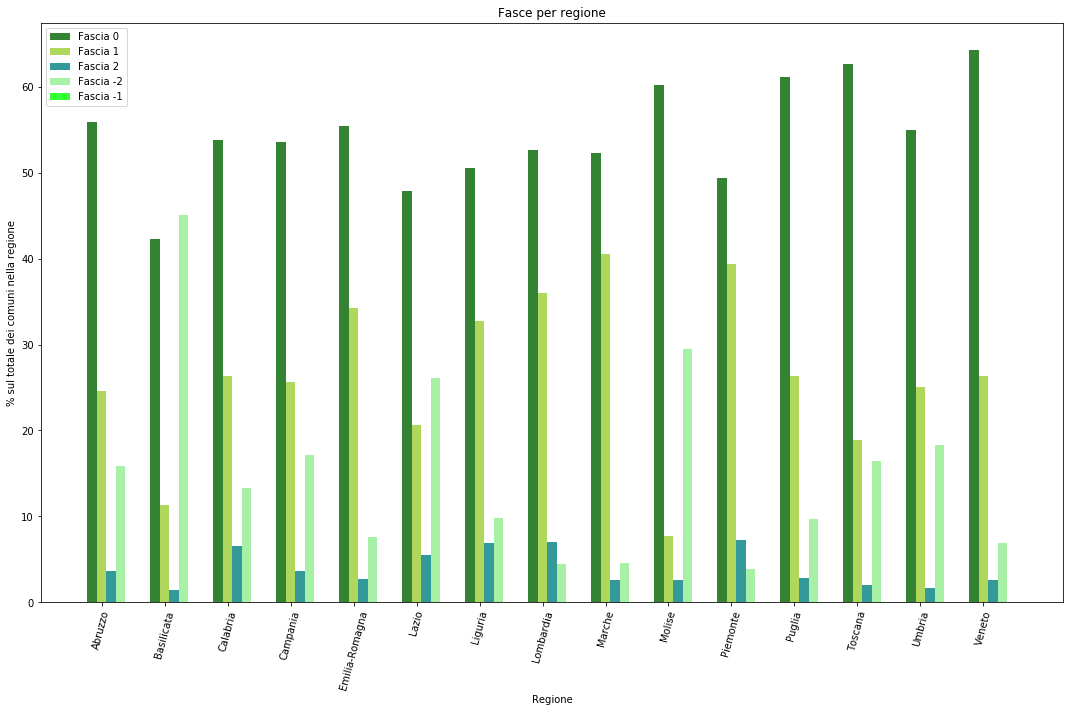

In [184]:
# Creare il grafico
# Dati utili per costruire il grafico

# Numero di comuni per regione
#comune_per_regione = df['Regione_x'].value_counts()

# Lista regioni
#regioni = [r for r in df['Regione_x'].unique() if type(r)==str]


#percentuali_fasce_per_regione = {r: df[df['Regione_x']==r]['fasce'].value_counts()/comune_per_regione.loc[r]*100 for r in regioni}

# Crea i dati da inserire nel grafico
#list_fasce = defaultdict(list)
#for r,t in percentuali_fasce_per_regione.items():
#    for f in t.index:
#        list_fasce[f] += [(t.loc[f],r)]

voter_tab = pd.crosstab(df['fasce'], df['Regione_x'], margins = True).iloc[:,:15]
voter_tab = voter_tab/voter_tab.loc['All']*100

n_groups = 15
fascia_0 = voter_tab.loc['fascia_0']
fascia_1 = voter_tab.loc['fascia_1']#[i for i,j in list_fasce['fascia_1']]
fascia_2 = voter_tab.loc['fascia_2']#[i for i,j in list_fasce['fascia_2']]
fascia_meno_1 = [0]*len(regioni)
fascia_meno_2 = voter_tab.loc['fascia_meno_2']#[i for i,j in list_fasce['fascia_meno_2']]
 
# create plot
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, fascia_0, bar_width,
                 alpha=opacity,
                 color='darkgreen',
                 label='Fascia 0')
 
rects2 = plt.bar(index + bar_width, fascia_1, bar_width,
                 alpha=opacity,
                 color='yellowgreen',
                 label='Fascia 1')

rects2 = plt.bar(index + 2*(bar_width), fascia_2, bar_width,
                 alpha=opacity,
                 color='teal',
                 label='Fascia 2')

rects2 = plt.bar(index + 3*(bar_width), fascia_meno_2, bar_width,
                 alpha=opacity,
                 color='lightgreen',
                 label='Fascia -2')

rects2 = plt.bar(index + 4*(bar_width), fascia_meno_1, bar_width,
                 alpha=opacity,
                 color='lime',
                 label='Fascia -1')
 

 
plt.xlabel('Regione')
plt.ylabel('% sul totale dei comuni nella regione')
plt.title('Fasce per regione')
plt.xticks(index + bar_width, voter_tab.columns, rotation =75)
plt.legend()
 
plt.tight_layout()
plt.show()

__INSERIRE COMMENTI AL GRAFICO__

La presenza di queste caratteristiche tra Nord e resto dell'Italia è confermata dal fatto che le due variabili categoriche (`Regioni`, `Fasce`) risultano avere un'associazione statistica. Infatti, il test Chi-quadro per l'indipendenza statistica delle variabili, afferma che le due non lo sono.

### 2.1. Spesa pro-capite: top-10 e bottom-10 dei comuni italiani <a name="#par2.1"></a>

## 3. Confronto anni 2010-2013 <a name="#vs"></a>

## Piccola viz tramite boxplot/bins delle regioni



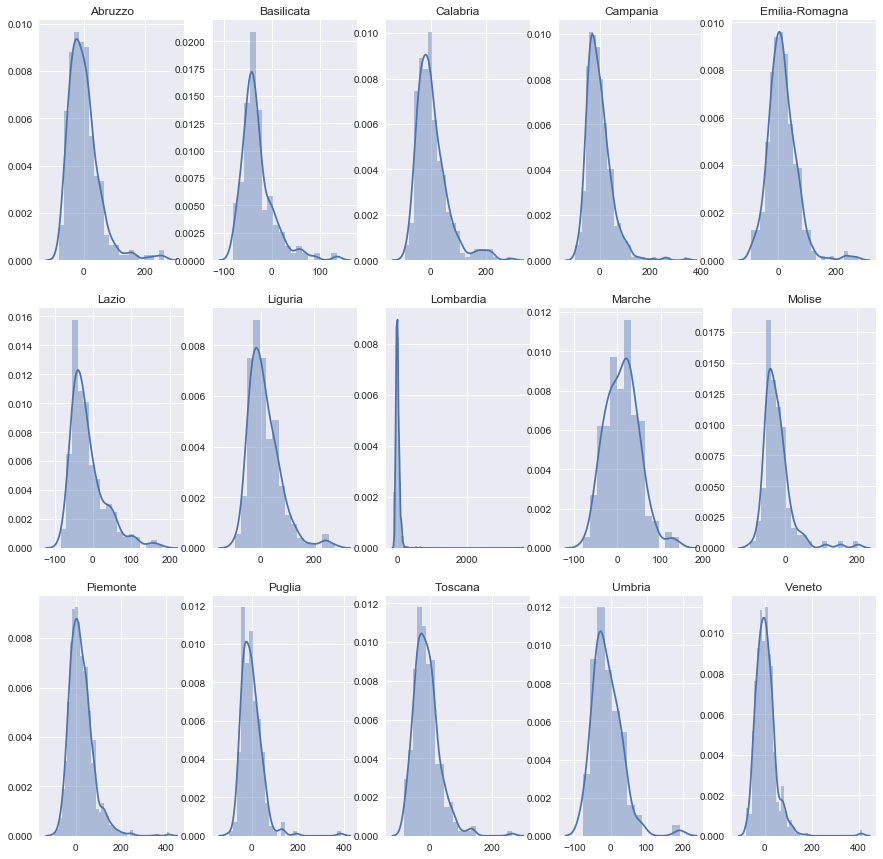

In [211]:
def buckets(i):
    return list(df['LQP_COD_1'].groupby(df['Regione_x']))[i][0]

num_plots = len(df['LQP_COD_1'].groupby(df['Regione_x']).describe())
fig, axes = plt.subplots(3,5,figsize=(15,15))

for i in range(num_plots):
    distribuzione_regione = list(df['LQP_COD_1'].groupby(df['Regione_x']))[i][1]
    distribuzione_regione = [i for i in distribuzione_regione if math.isnan(i) == False]
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    sns.distplot(np.array(distribuzione_regione), ax=ax_curr)
    ax_curr.set_title(buckets(i))

* Nella maggior parte delle regioni il 50% dei comuni ha fabbisogni maggiorni della spesa
* Si osserva in tutte le distribuzioni la presanza di code per valori della variabile maggiori di 0. Quindi riconosciamo che sicuramente in quasi tutte le regioni il 25% dei comuni registra una spesa sui trasporti superiore ai fabbisogni. In delle situazioni questa spesa eccede di molto i fabbisogni.

## Distribuzione delle differenze rispetto le province

* Raggruppa per province
* Definisci l'area geografica della provincia
* Confronta con paiplot dove si posizionano le province rispetto alle variabili *spesa in trasporti per abitante* e *differenza tra spesa storica e fabbisogno standard*  

In [278]:
province_valori = df[['LQP_COD_1','IND4']].groupby(df['Provincia']).describe()
province_valori.head()

LQP_COD_1                                              \
                  count       mean        std        min        25%   
Provincia                                                             
Alessandria       187.0  33.487299  56.727093 -79.146601  -9.233756   
Ancona             45.0  16.335904  42.255801 -51.308538 -16.482746   
Arezzo             39.0   2.220458  38.172262 -68.730127 -19.929294   
Ascoli Piceno      32.0  16.063335  34.376799 -79.879836   8.150053   
Asti              117.0  54.683764  37.797769 -20.264511  22.662070   

                                                  IND4                        \
                     50%        75%         max  count       mean        std   
Provincia                                                                      
Alessandria    25.435189  67.957868  191.502776  187.0  21.399357  71.645725   
Ancona          9.968360  48.267641  131.274031   45.0   6.161778  43.415019   
Arezzo         -4.428916  13.871842  114.952979   39.0  23.707521  47.354710   
Ascoli Piceno  20.971838  32.916528   85.431615   32.0   0.939193  35.103901   
Asti           46.358396  81.458006  219.451727  117.0  46.079159  58.696924   

                                                                       
                     min        25%        50%        75%         max  
Provincia                                                              
Alessandria   -82.957206 -25.796261   3.502643  48.532922  430.025214  
Ancona        -44.128260 -22.835668  -9.356882  22.589433  135.395070  
Arezzo        -42.976893  -7.704514   7.799936  56.191697  141.341881  
Ascoli Piceno -47.547511 -22.656949  -9.395298  14.705686  100.646974  
Asti          -60.999849   9.437408  39.922677  67.139682  243.847127

* Crea variabile su aree regionali

In [279]:
data_province = list(df[['AreaGeo', 'Regione_x']].groupby(df['Provincia']))

dict_provincia_areageo = {data_province[i][0]:list(data_province[i][1]['AreaGeo'])[0]  for i in range(len(data_province))}
provincia_areageo = [list(data_province[i][1]['AreaGeo'])[0]  for i in range(len(data_province))]

In [280]:
var_1 = province_valori['LQP_COD_1']['mean']
var_2 = province_valori['IND4']['mean']

#if math.isnan(i) == False

In [281]:
zip_data = list(zip(provincia_areageo,var_1,var_2))

In [282]:
# Create df
to_plot = pd.DataFrame(zip_data, columns = ['Area', 'Differenza', 'Offerti/standard'])

In [283]:
to_plot.head(3)

,Area,Differenza,Offerti/standard
0,Nord-ovest,33.487299,21.399357
1,Centro,16.335904,6.161778
2,Centro,2.220458,23.707521


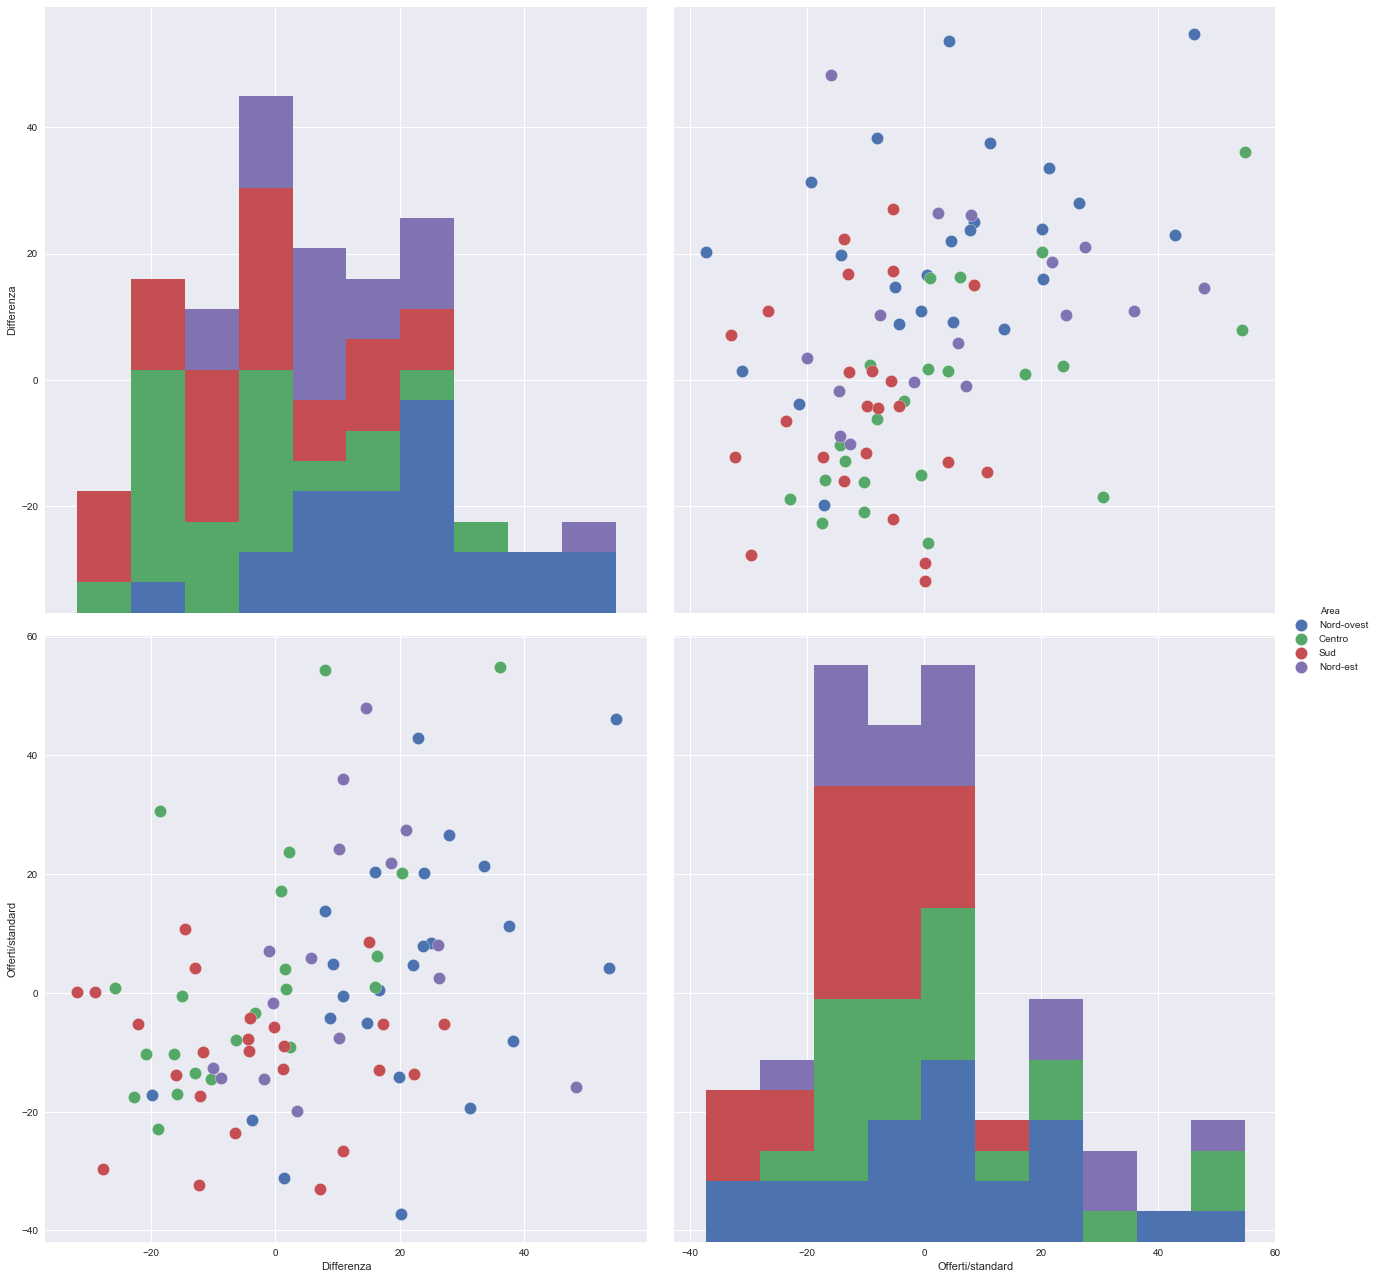

In [286]:
g = sns.pairplot(to_plot, hue="Area", size = 9, dropna=True,plot_kws={"s": 150})

In [219]:
for e,i in enumerate(zip_data):
    if i[1] > 0:
        print (data_province[e][0])
    
    #print (e,i)

Asti
Como
Rovigo


## Distribuzione delle differenze comuni
quanti diversa da 0 (>o<) quanti uguali

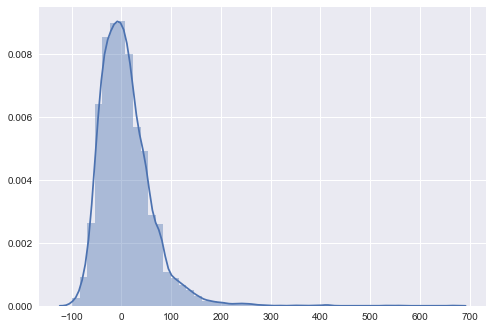

In [252]:
data_comuni = np.array(df['LQP_COD_1'][df.LQP_COD_1.isnull() == False])
data_comuni = np.array([i for i in data_comuni if i <1000])
sns.distplot(data_comuni)

### Comuni la cui spesa storica è almeno 3 volte il fabbisogno standard

In [458]:
df_comuni = df[(df['LQP_COD_1']>200) & (df['LQP_COD_1']<1000)]
df_comuni = df_comuni[df_comuni['Denominazione Italiana_x'].notnull()]

In [459]:
color_list = []
for i in df_comuni['AreaGeo']:
    if i=='Centro':
        color_list += ['b']#blu
    elif i=='Nord-est':
        color_list += ['g']#verde
    elif i=='Nord-ovest':
        color_list += ['r']#ross
    else:
        color_list += ['c']#azzurro

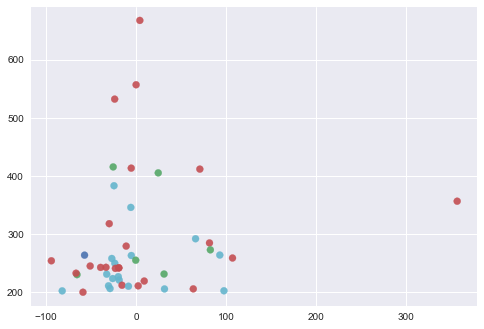

In [460]:
x = np.array(df_comuni['IND4'])
y = np.array(df_comuni['LQP_COD_1'])
colors = color_list
plt.scatter(x, y,  c=colors, alpha=0.9)
plt.show()

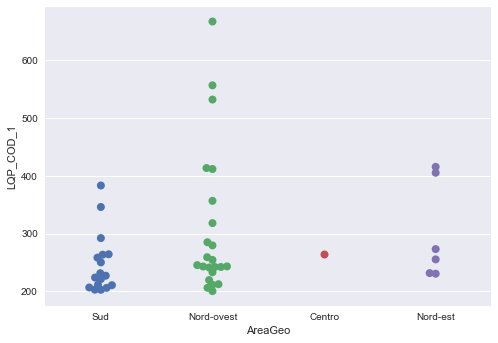

In [319]:
sns.swarmplot(x="AreaGeo", y="LQP_COD_1", data=df_comuni, size=8)

# Generale

In [461]:
numero_comuni_per_area = df.groupby('AreaGeo').describe()['ANNO']['count']

In [463]:
df['fasce'] = df.LQP_COD_1.apply(fasce)

In [464]:
df['scaglioni_ind4'] = df.IND4.apply(fasce)

In [465]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(color_codes=True)

In [185]:
voter_tab = pd.crosstab(df['fasce'], df['Regione_x'], margins = True)

#voter_tab.columns = ["democrat","independent","republican","row_totals"]

#voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]
observed = voter_tab.iloc[0:5,0:55]

In [186]:
expected =  np.outer(voter_tab["All"][0:5],
                     voter_tab.loc["All"][0:15]) / 5221

expected = pd.DataFrame(expected)

expected.columns = voter_tab.columns[0:15]
expected.index = ['fascia_0', 'fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']

In [187]:
expected

Regione_x,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Lazio,Liguria,Lombardia,Marche,Molise,Piemonte,Puglia,Toscana,Umbria,Veneto
fascia_0,117.395135,37.886612,147.811147,202.239801,160.617889,127.000192,92.848880,697.433825,104.054779,41.621912,549.622678,93.382494,107.256464,32.016855,249.197855
fascia_1,68.431335,22.084658,86.161272,117.888527,93.626508,74.030262,54.122965,406.544340,60.655047,24.262019,320.383068,54.434016,62.521356,18.663091,145.261061
fascia_2,11.334993,3.658111,14.271787,19.527102,15.508332,12.262402,8.964949,67.340165,10.046926,4.018770,53.068378,9.016472,10.356062,3.091362,24.061099
fascia_meno_1,20.815936,6.717870,26.209155,35.860180,28.479985,22.519058,16.463513,123.665581,18.450488,7.380195,97.456426,16.558131,19.018196,5.677073,44.186554
fascia_meno_2,217.977399,70.347251,274.453361,375.515610,298.232714,235.811913,172.400306,1294.983911,193.207240,77.282896,1020.530550,173.391113,199.152078,59.448382,462.706570


In [188]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

4378.353995999349


In [189]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 56)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=56)
print("P value")
print(p_value)

Critical value
74.4683241593
P value
0.0


In [481]:
voter_tab = pd.crosstab(df['fasce'], df['scaglioni_ind4'], margins = True)

#voter_tab.columns = ["democrat","independent","republican","row_totals"]

#voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]
observed = voter_tab.iloc[0:5,0:5]

In [486]:
observed

scaglioni_ind4,fascia_0,fascia_1,fascia_2,fascia_meno_1,fascia_meno_2
fasce,,,,,
fascia_0,574,212,115,1208,106
fascia_1,207,86,55,363,47
fascia_2,86,28,34,140,31
fascia_meno_1,599,175,75,1666,160
fascia_meno_2,94,20,13,311,56


In [483]:
expected =  np.outer(voter_tab["All"][0:5],
                     voter_tab.loc["All"][0:5]) / 6461

expected = pd.DataFrame(expected)

expected.columns = ['fascia_0', 'fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']
expected.index = ['fascia_0', 'fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']

In [488]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

186.54205360672864


In [490]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 16)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=16)
print("P value")
print(p_value)

Critical value
26.2962276049
P value
0.0


## Fascia 2

In [426]:
df_comuni = df[(df['LQP_COD_1']>100) & (df['LQP_COD_1']<1000)]
df_comuni = df_comuni[df_comuni['Denominazione Italiana_x'].notnull()]

In [427]:
color_list = []
for i in df_comuni['AreaGeo']:
    if i=='Centro':
        color_list += ['g']#blu
    elif i=='Nord-est':
        color_list += ['purple']#verde
    elif i=='Nord-ovest':
        color_list += ['b']#ross
    else:
        color_list += ['r']#azzurro

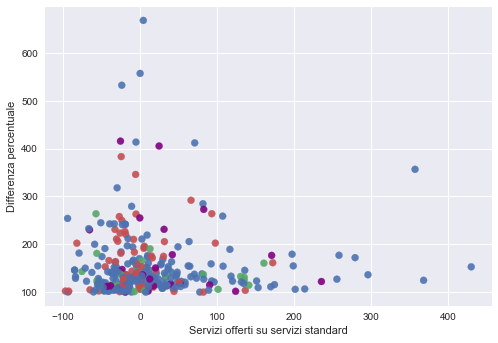

In [430]:
x = np.array(df_comuni['IND4'])
y = np.array(df_comuni['LQP_COD_1'])
colors = color_list
plt.scatter(x, y,  c=colors, alpha=0.9)
plt.xlabel('Servizi offerti su servizi standard')
plt.ylabel('Differenza percentuale')
plt.show()

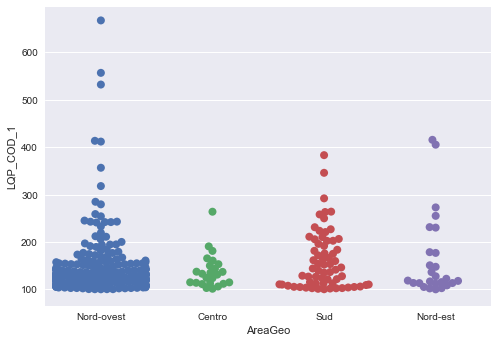

In [431]:
sns.swarmplot(x="AreaGeo", y="LQP_COD_1", data=df_comuni, size=8)

## Fascia 1

In [432]:
df_comuni = df[(df['LQP_COD_1']>50) & (df['LQP_COD_1']<100)]
df_comuni = df_comuni[df_comuni['Denominazione Italiana_x'].notnull()]

In [433]:
color_list = []
for i in df_comuni['AreaGeo']:
    if i=='Centro':
        color_list += ['g']#blu
    elif i=='Nord-est':
        color_list += ['purple']#verde
    elif i=='Nord-ovest':
        color_list += ['b']#ross
    else:
        color_list += ['r']#azzurro

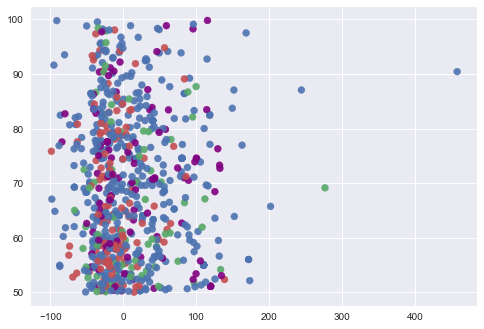

In [434]:
x = np.array(df_comuni['IND4'])
y = np.array(df_comuni['LQP_COD_1'])
colors = color_list
plt.scatter(x, y,  c=colors, alpha=0.9)
plt.show()

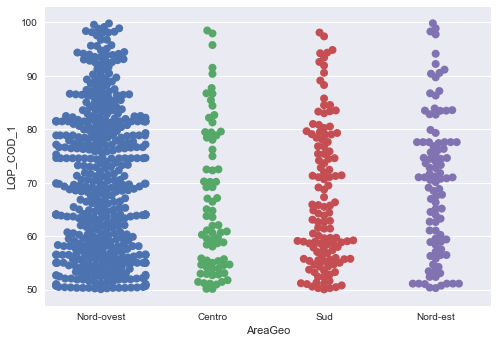

In [435]:
sns.swarmplot(x="AreaGeo", y="LQP_COD_1", data=df_comuni, size=8)

## Fascia 0

In [437]:
df_comuni = df[(df['LQP_COD_1']>0) & (df['LQP_COD_1']<50)]
df_comuni = df_comuni[df_comuni['Denominazione Italiana_x'].notnull()]

In [438]:
color_list = []
for i in df_comuni['AreaGeo']:
    if i=='Centro':
        color_list += ['g']#blu
    elif i=='Nord-est':
        color_list += ['purple']#verde
    elif i=='Nord-ovest':
        color_list += ['b']#ross
    else:
        color_list += ['r']#azzurro

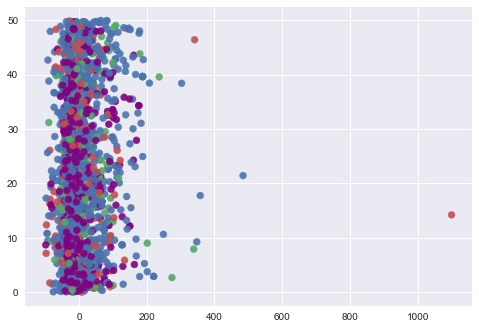

In [439]:
x = np.array(df_comuni['IND4'])
y = np.array(df_comuni['LQP_COD_1'])
colors = color_list
plt.scatter(x, y,  c=colors, alpha=0.9)
plt.show()

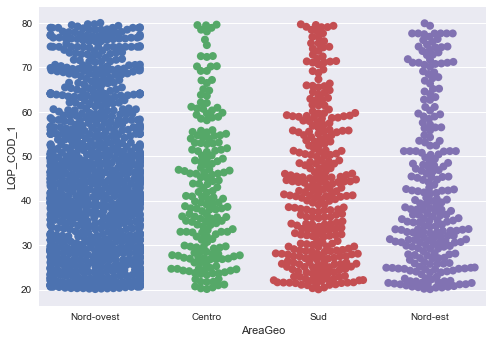

In [357]:
sns.swarmplot(x="AreaGeo", y="LQP_COD_1", data=df_comuni, size=8)

## Fase 0

In [358]:
df_comuni = df[(df['LQP_COD_1']>0) & (df['LQP_COD_1']<30)]
df_comuni = df_comuni[df_comuni['Denominazione Italiana_x'].notnull()]

In [359]:
color_list = []
for i in df_comuni['AreaGeo']:
    if i=='Centro':
        color_list += ['g']#blu
    elif i=='Nord-est':
        color_list += ['purple']#verde
    elif i=='Nord-ovest':
        color_list += ['b']#ross
    else:
        color_list += ['r']#azzurro

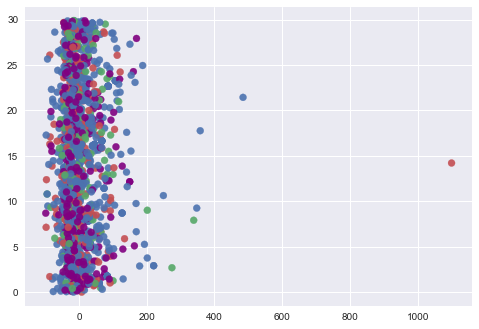

In [360]:
x = np.array(df_comuni['IND4'])
y = np.array(df_comuni['LQP_COD_1'])
colors = color_list
plt.scatter(x, y,  c=colors, alpha=0.9)
plt.show()

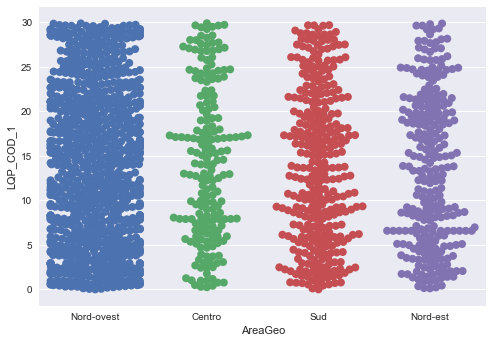

In [361]:
sns.swarmplot(x="AreaGeo", y="LQP_COD_1", data=df_comuni, size=8)

## Fase -1

In [440]:
df_comuni = df[(df['LQP_COD_1']>-50) & (df['LQP_COD_1']<0)]
df_comuni = df_comuni[df_comuni['Denominazione Italiana_x'].notnull()]

In [441]:
color_list = []
for i in df_comuni['AreaGeo']:
    if i=='Centro':
        color_list += ['g']#blu
    elif i=='Nord-est':
        color_list += ['purple']#verde
    elif i=='Nord-ovest':
        color_list += ['b']#ross
    else:
        color_list += ['r']#azzurro

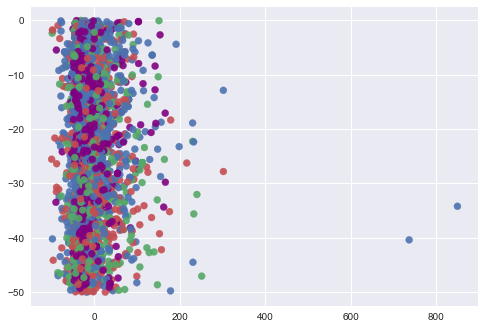

In [442]:
x = np.array(df_comuni['IND4'])
y = np.array(df_comuni['LQP_COD_1'])
colors = color_list
plt.scatter(x, y,  c=colors, alpha=0.9)
plt.show()

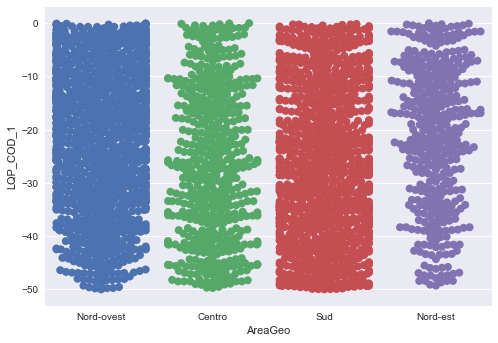

In [443]:
sns.swarmplot(x="AreaGeo", y="LQP_COD_1", data=df_comuni, size=8)

## Fase -2

In [444]:
df_comuni = df[(df['LQP_COD_1']>-100) & (df['LQP_COD_1']<-50)]
df_comuni = df_comuni[df_comuni['Denominazione Italiana_x'].notnull()]

In [445]:
color_list = []
for i in df_comuni['AreaGeo']:
    if i=='Centro':
        color_list += ['g']#blu
    elif i=='Nord-est':
        color_list += ['purple']#verde
    elif i=='Nord-ovest':
        color_list += ['b']#ross
    else:
        color_list += ['r']#azzurro

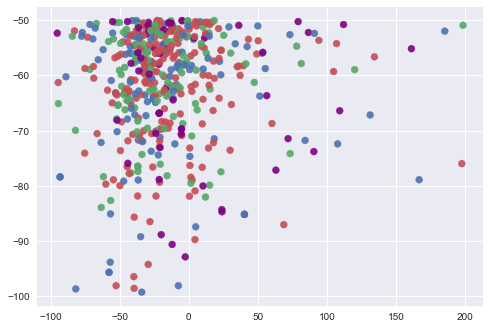

In [446]:
x = np.array(df_comuni['IND4'])
y = np.array(df_comuni['LQP_COD_1'])
colors = color_list
plt.scatter(x, y,  c=colors, alpha=0.9)
plt.show()

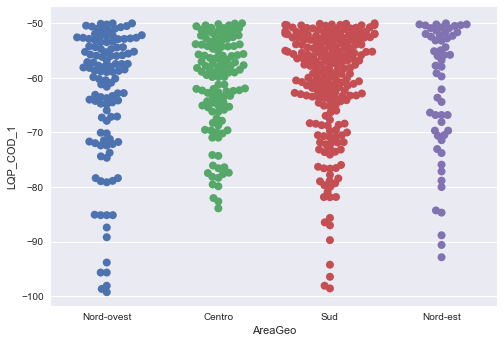

In [447]:
sns.swarmplot(x="AreaGeo", y="LQP_COD_1", data=df_comuni, size=8)

In [552]:
# Redditi e tasse
df_comuni['Reddito totale frequenze'] = df_comuni['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df_comuni['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df_comuni['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df_comuni['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df_comuni['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df_comuni['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df_comuni['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df_comuni['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 

In [553]:
df_comuni['Reddito totale frequenze']

345       625.0
511       456.0
650      1690.0
843       165.0
861       156.0
964       160.0
1140     1855.0
1719      279.0
1756      900.0
1896       69.0
1904     1306.0
1977      130.0
2023       42.0
2179      257.0
2342     5750.0
2411     2327.0
2460     1675.0
2818     8845.0
2855      173.0
3017     1617.0
3238     7916.0
3282     1627.0
3634     6480.0
3837    14948.0
3883     1838.0
3952     2017.0
4246     8247.0
4332      554.0
4421      774.0
4474     4126.0
4733     2295.0
4741     2880.0
4806     2840.0
4822      234.0
4870     3350.0
5075     2260.0
5138    10829.0
5409      683.0
5423     4362.0
5448     5776.0
5479      102.0
5552      925.0
5750      612.0
5844     7609.0
6181      395.0
6317      174.0
6597     3302.0
Name: Reddito totale frequenze, dtype: float64

In [492]:
df['LQP_COD_1'].corr(df['IND4'])

0.10157684357453269

In [338]:
len(df_comuni[df_comuni['Reddito complessivo da 10000 a 15000 euro - Frequenza']<0])

0

# Quando la spesa storica è maggiore del fabbisogno, mi aspetto che il livello di servizi offerti sia, almeno, vicino a quello dei servizi standard. Di che regione/area geografica sono i comuni in cui questo non avviene?

In [500]:
non_buono = df[['LQP_COD_1','IND4', 'AreaGeo']][(df['LQP_COD_1']>0) & (df['IND4']<-50)]

In [515]:
count_area = non_buono.groupby('AreaGeo').describe()['IND4']['count']

In [517]:
count_area/sum(count_area)*100

AreaGeo
Centro        10.326087
Nord-est       6.521739
Nord-ovest    66.304348
Sud           16.847826
Name: count, dtype: float64

In [506]:
df.groupby('AreaGeo').describe()['ANNO']['count']

AreaGeo
Centro         996.0
Nord-est       929.0
Nord-ovest    2984.0
Sud           1790.0
Name: count, dtype: float64

In [508]:
31/1790*100

1.7318435754189943

In [509]:
122/2984*100

4.088471849865952

In [510]:
12/929*100

1.2917115177610334

In [513]:
19/996*100

1.9076305220883536

In [518]:
molto_buono = df[['LQP_COD_1','IND4', 'AreaGeo']][(df['LQP_COD_1']>0) & (df['LQP_COD_1']<25) & (df['IND4']>0) & (df['IND4']<25) &(df['IND4']>-25)]

In [520]:
count_area = molto_buono.groupby('AreaGeo').describe()['IND4']['count']

In [521]:
count_area/sum(count_area)*100

AreaGeo
Centro        12.121212
Nord-est      20.707071
Nord-ovest    45.959596
Sud           21.212121
Name: count, dtype: float64

In [522]:
count_area

AreaGeo
Centro        24.0
Nord-est      41.0
Nord-ovest    91.0
Sud           42.0
Name: count, dtype: float64

In [523]:
df.groupby('AreaGeo').describe()['ANNO']['count']

AreaGeo
Centro         996.0
Nord-est       929.0
Nord-ovest    2984.0
Sud           1790.0
Name: count, dtype: float64

In [524]:
24/996*100

2.4096385542168677

In [525]:
41/929*100

4.413347685683531

In [526]:
91/2984*100

3.049597855227882

In [527]:
42/1790*100

2.346368715083799

In [528]:
molto_buono = df[['LQP_COD_1','IND4', 'Regione_x']][(df['LQP_COD_1']>0) & (df['LQP_COD_1']<25) & (df['IND4']>0) & (df['IND4']<25) &(df['IND4']>-25)]

In [542]:
molto_buono.groupby('Regione_x').describe()['IND4']['count']

Regione_x
Abruzzo           10.0
Basilicata         2.0
Calabria           9.0
Campania          11.0
Emilia-Romagna    23.0
Lazio              2.0
Liguria            8.0
Lombardia         36.0
Marche             8.0
Molise             2.0
Piemonte          47.0
Puglia             8.0
Toscana           11.0
Umbria             3.0
Veneto            18.0
Name: count, dtype: float64

In [544]:
molto_buono.groupby('Regione_x').describe()['IND4']['count']/df.groupby('Regione_x').describe()['ANNO']['count']*100

Regione_x
Abruzzo           3.278689
Basilicata        1.526718
Calabria          2.200489
Campania          1.996370
Emilia-Romagna    6.609195
Lazio             0.529101
Liguria           3.404255
Lombardia         2.333117
Marche            3.347280
Molise            1.470588
Piemonte          3.897181
Puglia            3.100775
Toscana           3.832753
Umbria            3.260870
Veneto            3.098107
Name: count, dtype: float64

In [530]:
count_area = molto_buono.groupby('Regione_x').describe()['IND4']['count']

In [533]:
count_area/sum(count_area)*100

Regione_x
Abruzzo            5.050505
Basilicata         1.010101
Calabria           4.545455
Campania           5.555556
Emilia-Romagna    11.616162
Lazio              1.010101
Liguria            4.040404
Lombardia         18.181818
Marche             4.040404
Molise             1.010101
Piemonte          23.737374
Puglia             4.040404
Toscana            5.555556
Umbria             1.515152
Veneto             9.090909
Name: count, dtype: float64

In [534]:
count_area

Regione_x
Abruzzo           10.0
Basilicata         2.0
Calabria           9.0
Campania          11.0
Emilia-Romagna    23.0
Lazio              2.0
Liguria            8.0
Lombardia         36.0
Marche             8.0
Molise             2.0
Piemonte          47.0
Puglia             8.0
Toscana           11.0
Umbria             3.0
Veneto            18.0
Name: count, dtype: float64

In [546]:
list(df.columns)

['Anno',
 'Codice_Nazionale',
 'Codice_Istat',
 'Denominazione Italiana_x',
 'Provincia',
 'Sigla Provincia',
 'Codice_Provincia',
 'Regione_x',
 'Sigla Regione',
 'Codice_Regione',
 'AreaGeo',
 'CAT_DET_COD_1',
 'CAT_DET_COD_2',
 'CAT_DET_COD_3',
 'CAT_DET_COD_4',
 'CAT_DET_COD_5',
 'CAT_DET_COD_6',
 'CAT_DET_COD_7',
 'COEFF_TEORICO',
 'IND1',
 'IND3',
 'IND4',
 'IND5',
 'IND6',
 'IND7',
 'IND8',
 'IND9',
 'IND10',
 'LQP_COD_1',
 'LQP_COD_2',
 'LQP_COD_3',
 'LQP_COD_4',
 'LQP_COD_5',
 'LQP_COD_6',
 'LQP_COD_S',
 'ANNO',
 'COMUNE_CAT_COD',
 'SPESA_CCC_FC01A',
 'TOT_SPESA_CCC_FC01A',
 'SPESA_CCC_FC01B',
 'TOT_SPESA_CCC_FC01B',
 'SPESA_CCC_FC01C',
 'TOT_SPESA_CCC_FC01C',
 'SPESA_CCC_FC01D',
 'TOT_SPESA_CCC_FC01D',
 'SPESA_CCC_FC02U',
 'TOT_SPESA_CCC_FC02U',
 'SPESA_CCC_FC03U',
 'TOT_SPESA_CCC_FC03U',
 'SPESA_CCC_FC04A',
 'TOT_SPESA_CCC_FC04A',
 'SPESA_CCC_FC04B',
 'TOT_SPESA_CCC_FC04B',
 'SPESA_CCC_FC05A',
 'TOT_SPESA_CCC_FC05A',
 'SPESA_CCC_FC05B',
 'TOT_SPESA_CCC_FC05B',
 'SPESA_CCC_FC

In [554]:
# Redditi e tasse
df['Reddito totale frequenze'] = df['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 

In [569]:
# Fascia 2,1,0,-1,-2
df[['Reddito complessivo da 0 a 10000 euro - Frequenza', 'fasce']].groupby('fasce').describe()

Reddito complessivo da 0 a 10000 euro - Frequenza               \
                                                          count         mean   
fasce                                                                          
fascia_0                                                 2211.0  1549.799638   
fascia_1                                                  756.0  1205.354497   
fascia_2                                                  317.0  2693.542587   
fascia_meno_1                                            2674.0  1736.878459   
fascia_meno_2                                             494.0  1479.089069   

                                                                    
                        std   min    25%    50%      75%       max  
fasce                                                               
fascia_0        6411.059541   7.0  279.0  597.0  1277.50  246097.0  
fascia_1        5294.392478  22.0  202.5  457.0  1055.25  129840.0  
fascia_2       30527.657201  14.0  161.0  328.0   907.00  542431.0  
fascia_meno_1   4596.498275  10.0  328.0  732.0  1692.75  170535.0  
fascia_meno_2   2704.809465  15.0  325.5  686.0  1595.75   27173.0

In [562]:
df[['Reddito totale frequenze']].groupby('Regione_x')

0       15071.0
1         267.0
2       68749.0
3         569.0
4         653.0
5         742.0
6         374.0
7         280.0
8        4739.0
9         232.0
10       1103.0
11       1594.0
12       1238.0
13        357.0
14        579.0
15         99.0
16       1393.0
17       1516.0
18        465.0
19       1091.0
20       1889.0
21        933.0
22        240.0
23        387.0
24        490.0
25        426.0
26        623.0
27        445.0
28       1512.0
29        809.0
         ...   
6678     4058.0
6679      450.0
6680     1250.0
6681      826.0
6682     3627.0
6683      816.0
6684     5417.0
6685      911.0
6686      721.0
6687     3270.0
6688     2934.0
6689     2852.0
6690     1379.0
6691     1558.0
6692     1004.0
6693     2152.0
6694     3951.0
6695      767.0
6696      811.0
6697     1538.0
6698      598.0
6699     1030.0
6700     1561.0
6701     3941.0
6702      537.0
6703      814.0
6704    20222.0
6705      552.0
6706     1133.0
6707     1221.0
Name: Reddito totale fre

In [551]:
df['tot_abitanti_tasse']

0       15071.0
1         267.0
2       68749.0
3         569.0
4         653.0
5         742.0
6         374.0
7         280.0
8        4739.0
9         232.0
10       1103.0
11       1594.0
12       1238.0
13        357.0
14        579.0
15         99.0
16       1393.0
17       1516.0
18        465.0
19       1091.0
20       1889.0
21        933.0
22        240.0
23        387.0
24        490.0
25        426.0
26        623.0
27        445.0
28       1512.0
29        809.0
         ...   
6678     4058.0
6679      450.0
6680     1250.0
6681      826.0
6682     3627.0
6683      816.0
6684     5417.0
6685      911.0
6686      721.0
6687     3270.0
6688     2934.0
6689     2852.0
6690     1379.0
6691     1558.0
6692     1004.0
6693     2152.0
6694     3951.0
6695      767.0
6696      811.0
6697     1538.0
6698      598.0
6699     1030.0
6700     1561.0
6701     3941.0
6702      537.0
6703      814.0
6704    20222.0
6705      552.0
6706     1133.0
6707     1221.0
Name: tot_abitanti_tasse

## Distribuzione delle differenze comuni
quanti diversa da 0 (>o<) quanti uguali

## Quali sono questi comuni?

Caratteristiche del comune:

* Reddito complessivo
* La soddisfazione dei cittadini è inferiore quando la differenza è negativa? Se si, si chiede un aumento della spesa. Se no, probabilmente il fabbisogno non rispecchia le vere necessità in ambito trasporti.

## Aree geografiche

* __Nord-Ovest__:	Piemonte, Lombardia, Liguria
* __Nord-Est__:	Veneto, Emilia-Romagna
* __Centro__:	Toscana, Marche, Lazio, Umbria
* __Sud__:	Abruzzo, Molise, Campania, Basilicata, Puglia, Calabria

Area geografica vs Frequenza reddito vs tot_abitanti_tasse

## In più 

Per i paesi con reddito basso il tot relativo di persone che pagano le tasse o minore o inf
Per frequenza reddito e tot_abitanti_tasse

In [142]:
list(df.columns)

['Anno',
 'Codice_Nazionale',
 'Codice_Istat',
 'Denominazione Italiana_x',
 'Provincia',
 'Sigla Provincia',
 'Codice_Provincia',
 'Regione_x',
 'Sigla Regione',
 'Codice_Regione',
 'AreaGeo',
 'CAT_DET_COD_1',
 'CAT_DET_COD_2',
 'CAT_DET_COD_3',
 'CAT_DET_COD_4',
 'CAT_DET_COD_5',
 'CAT_DET_COD_6',
 'CAT_DET_COD_7',
 'COEFF_TEORICO',
 'IND1',
 'IND3',
 'IND4',
 'IND5',
 'IND6',
 'IND7',
 'IND8',
 'IND9',
 'IND10',
 'IND11',
 'IND12',
 'IND13',
 'LQP_COD_1',
 'LQP_COD_2',
 'LQP_COD_3',
 'LQP_COD_4',
 'LQP_COD_5',
 'LQP_COD_6',
 'LQP_COD_S',
 'ANNO',
 'COMUNE_CAT_COD',
 'SPESA_CCC_FC01A',
 'TOT_SPESA_CCC_FC01A',
 'SPESA_CCC_FC01B',
 'TOT_SPESA_CCC_FC01B',
 'SPESA_CCC_FC01C',
 'TOT_SPESA_CCC_FC01C',
 'SPESA_CCC_FC01D',
 'TOT_SPESA_CCC_FC01D',
 'SPESA_CCC_FC02U',
 'TOT_SPESA_CCC_FC02U',
 'SPESA_CCC_FC03U',
 'TOT_SPESA_CCC_FC03U',
 'SPESA_CCC_FC04A',
 'TOT_SPESA_CCC_FC04A',
 'SPESA_CCC_FC04B',
 'TOT_SPESA_CCC_FC04B',
 'SPESA_CCC_FC05A',
 'TOT_SPESA_CCC_FC05A',
 'SPESA_CCC_FC05B',
 'TOT_SP

In [53]:
distribuzione_abruzzo = list(df['LQP_COD_1'].groupby(df['Regione_x']))[0][1]

In [40]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns
import math
sns.set(color_codes=True)

In [57]:
distribuzione_abruzzo = [i for i in distribuzione_abruzzo if math.isnan(i) == False]

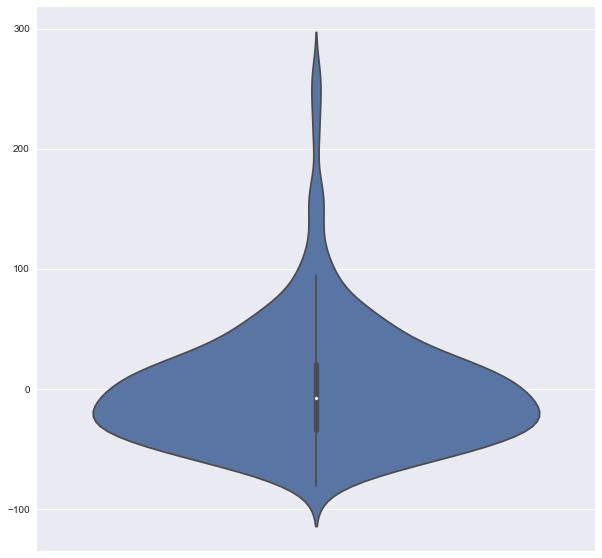

In [74]:
plt.figure(figsize=(10,10))
sns.violinplot(np.array(distribuzione_abruzzo), orient='v')

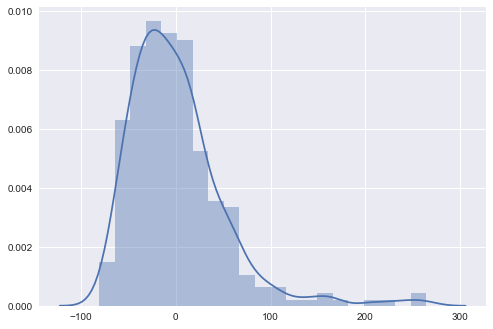

In [58]:
sns.distplot(np.array(distribuzione_abruzzo))

In [ ]:
distribuzione_abruzzo = list(df['LQP_COD_1'].groupby(df['Regione_x']))[0][1]

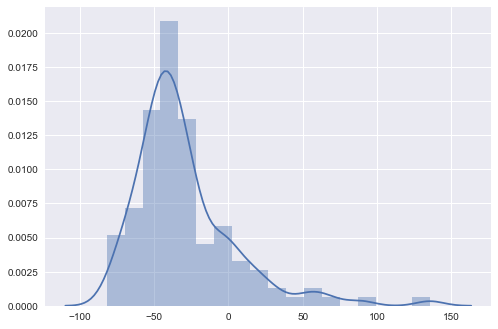

In [66]:
distribuzione_basilicata = list(df['LQP_COD_1'].groupby(df['Regione_x']))[1][1]
distribuzione_basilicata = [i for i in distribuzione_basilicata if math.isnan(i) == False]
sns.distplot(np.array(distribuzione_basilicata))

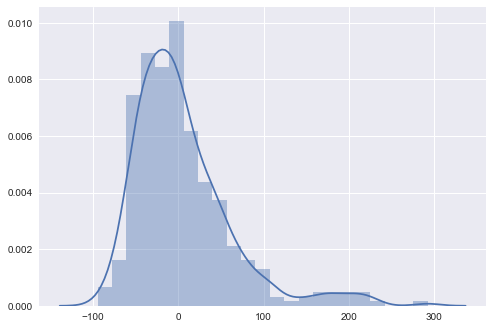

In [69]:
distribuzione_calabria = list(df['LQP_COD_1'].groupby(df['Regione_x']))[2][1]
distribuzione_calabria = [i for i in distribuzione_calabria if math.isnan(i) == False]
sns.distplot(np.array(distribuzione_calabria))

In [ ]:
distribuzione_calabria = list(df['LQP_COD_1'].groupby(df['Regione_x']))[2][1]
distribuzione_calabria = [i for i in distribuzione_calabria if math.isnan(i) == False]
sns.distplot(np.array(distribuzione_calabria))

In [68]:
for i in list(df['LQP_COD_1'].groupby(df['Regione_x'])):
    print (i[0])

Abruzzo
Basilicata
Calabria
Campania
Emilia-Romagna
Lazio
Liguria
Lombardia
Marche
Molise
Piemonte
Puglia
Toscana
Umbria
Veneto


### Differenza percentuale spesa fabbisogno rispetto al fabbisogno

In [49]:
df_2010.head(10)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana,Provincia,Sigla Provincia,Codice_Provincia,Regione,Sigla Regione,Codice_Regione,...,IND8,IND9,IND10,LQP_COD_1,LQP_COD_2,LQP_COD_3,LQP_COD_4,LQP_COD_5,LQP_COD_6,LQP_COD_S
0,2010,A052,6001.0,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.589474,30.0,3.260023,39.823718,-24.516654,0.0,0.0,8.0,3.0,3.0
1,2010,A146,6002.0,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,6.191950,86.235965,-19.242343,0.0,0.0,10.0,4.0,2.8
2,2010,A182,6003.0,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,5.0,6.538632,-73.740234,-27.195587,0.0,1.0,1.0,3.0,5.8
3,2010,A189,6004.0,Alfiano Natta,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,0.000000,116.316090,-1.767993,0.0,1.0,10.0,5.0,3.4
4,2010,A197,6005.0,Alice Bel Colle,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,2.685765,50.323794,22.585079,0.0,0.0,9.0,7.0,5.0
5,2010,A211,6006.0,Alluvioni Cambiň,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,2.028398,10.433453,-25.180096,0.0,0.0,6.0,3.0,3.8
6,2010,A227,6007.0,Altavilla Monferrato,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,1.976285,-9.208478,-82.957206,0.0,2.0,5.0,1.0,3.0
7,2010,A245,6008.0,Alzano Scrivia,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,5.263158,10.675213,-37.227356,0.0,0.0,6.0,2.0,3.2
8,2010,A436,6009.0,Arquata Scrivia,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,5.0,2.555911,3.752771,-17.385871,0.0,0.0,6.0,4.0,4.4
9,2010,A523,6010.0,Avolasca,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,0.000000,-63.139521,-53.047156,0.0,1.0,1.0,1.0,4.6


In [7]:
df_2010.columns

Index(['Anno', 'Codice_Nazionale', 'Codice_Istat', 'Denominazione Italiana',
       'Provincia', 'Sigla Provincia', 'Codice_Provincia', 'Regione',
       'Sigla Regione', 'Codice_Regione', 'AreaGeo', 'CAT_DET_COD_1',
       'CAT_DET_COD_2', 'CAT_DET_COD_3', 'CAT_DET_COD_4', 'CAT_DET_COD_5',
       'CAT_DET_COD_6', 'CAT_DET_COD_7', 'COEFF_TEORICO', 'IND1', 'IND3',
       'IND4', 'IND5', 'IND6', 'IND7', 'IND8', 'IND9', 'IND10', 'LQP_COD_1',
       'LQP_COD_2', 'LQP_COD_3', 'LQP_COD_4', 'LQP_COD_5', 'LQP_COD_6',
       'LQP_COD_S'],
      dtype='object')

* Raggruppa per privince ed esplora la variabile per ogni provincia.

In [50]:
df_2010['LQP_COD_1'].groupby(df_2010['Provincia']).describe().head()

,count,mean,std,min,25%,50%,75%,max
Provincia,,,,,,,,
Alessandria,187.0,33.487299,56.727093,-79.146601,-9.233756,25.435189,67.957868,191.502776
Ancona,45.0,16.335904,42.255801,-51.308538,-16.482746,9.968360,48.267641,131.274031
Arezzo,39.0,2.220458,38.172262,-68.730127,-19.929294,-4.428916,13.871842,114.952979
Ascoli Piceno,32.0,16.063335,34.376799,-79.879836,8.150053,20.971838,32.916528,85.431615
Asti,117.0,54.683764,37.797769,-20.264511,22.662070,46.358396,81.458006,219.451727


Con il fine di verificare il comportamento della variabile su comuni/province con diversa popolazione, integriamo i nostri dati con l'anagrafica dei comuni. In particolare, scegliamo di usare i dati del 2011, intuitivamente più simili a quelli del 2001.

In [75]:
df['LQP_COD_S'].groupby(df['Regione_x']).describe()

,count,mean,std,min,25%,50%,75%,max
Regione_x,,,,,,,,
Abruzzo,290.0,5.381379,1.863081,1.0,4.0,5.4,6.60,10.0
Basilicata,127.0,6.228346,1.587796,1.4,5.2,6.2,7.20,10.0
Calabria,367.0,5.118256,1.707607,1.0,4.0,5.0,6.20,10.0
Campania,521.0,4.862956,1.756140,1.0,3.6,4.6,6.00,10.0
Emilia-Romagna,341.0,5.384751,1.871018,1.0,4.2,5.4,6.60,10.0
Lazio,357.0,5.259384,1.844656,1.0,4.0,5.0,6.40,10.0
Liguria,225.0,5.258667,1.828282,1.0,4.0,5.2,6.40,10.0
Lombardia,1504.0,4.509840,1.848532,1.0,3.2,4.4,5.80,10.0
Marche,232.0,5.299138,1.853696,1.0,4.0,5.0,6.45,10.0


In [77]:
df['LQP_COD_1'].groupby(df['Regione_x']).describe()

,count,mean,std,min,25%,50%,75%,max
Regione_x,,,,,,,,
Abruzzo,290.0,1.031407,51.534102,-80.909633,-33.889312,-7.728418,21.069409,264.115764
Basilicata,127.0,-29.708511,34.374253,-81.851374,-49.950518,-37.763906,-18.937376,135.568198
Calabria,367.0,5.283880,57.995372,-94.231975,-34.124494,-6.331721,27.300262,292.129434
Campania,521.0,-3.467543,49.612399,-98.079192,-36.709050,-12.059960,19.338609,345.989634
Emilia-Romagna,341.0,14.486818,49.266000,-92.862889,-16.931819,9.045240,40.386610,273.039926
Lazio,357.0,-13.058019,46.092025,-83.914497,-45.055240,-25.564524,7.634818,181.302267
Liguria,225.0,13.677520,60.228638,-99.255891,-27.504339,2.373570,45.434469,279.495133
Lombardia,1504.0,21.981269,106.815904,-98.664155,-14.269523,11.200979,44.572163,3576.708754
Marche,232.0,11.259394,38.844111,-79.879836,-15.790491,13.512493,35.381659,143.451678
